In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


**mean Filtering**

kernel = $\frac 1 n^2 M_{n*n}$

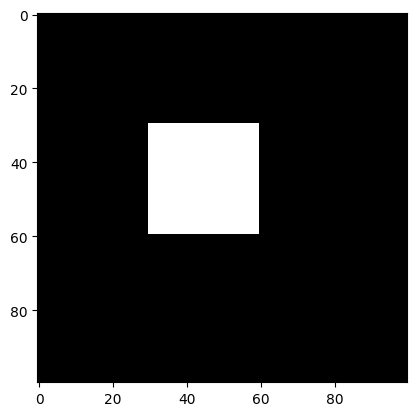

In [3]:


img= np.zeros((100,100),dtype = np.uint8)

img[30:60,30:60] = 255

plt.imshow(img,cmap = 'gray')
plt.show()

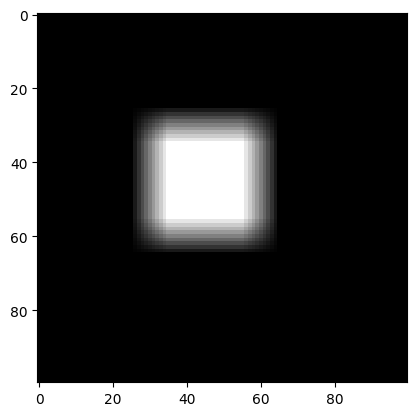

In [4]:
kernel = np.ones((10,10),np.float32)/100
image = cv2.filter2D(img,-1,kernel)
plt.imshow(image,cmap='gray')


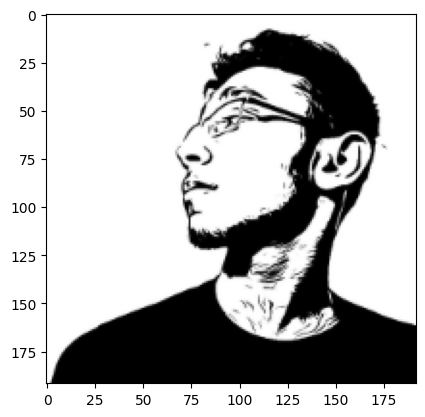

In [5]:
img1 = cv2.imread('images/12.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

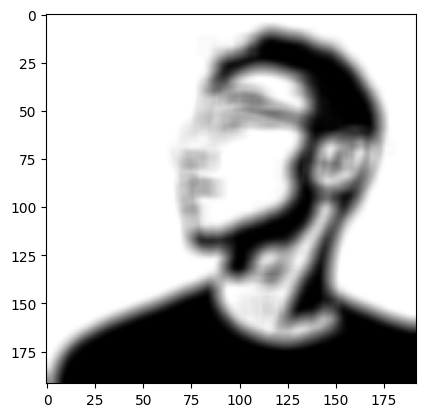

In [6]:
image = cv2.filter2D(img1,-1,kernel)
plt.imshow(image)

**Median Blur**

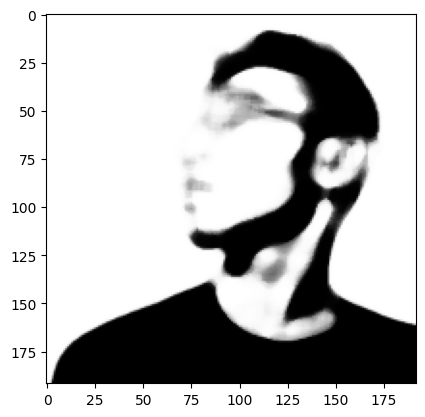

In [7]:
medianblur = cv2.medianBlur(img1,9)
plt.imshow(medianblur)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


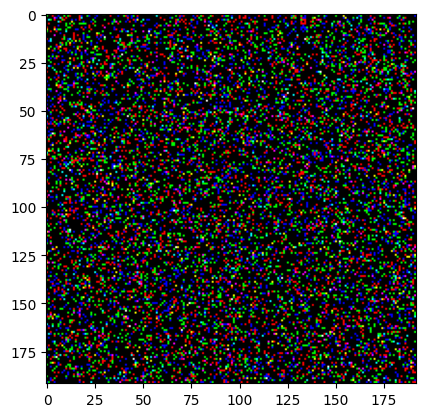

In [8]:
noise = np.random.rand(*img1.shape)*100
noise[noise<90]=0
plt.imshow(noise)

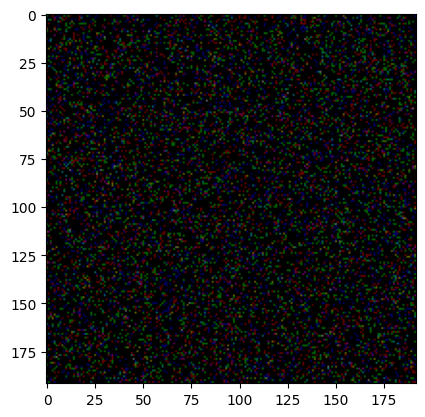

In [9]:
noise = noise.astype('uint8')
plt.imshow(noise)

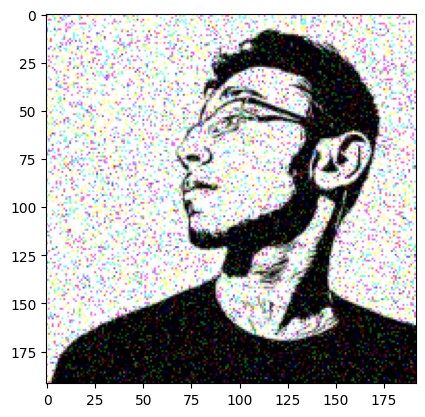

In [10]:
noisy_image = noise+img1 
noisy_image[noisy_image>255]=255
noisy_image = noisy_image.astype('uint8')
plt.imshow(noisy_image)

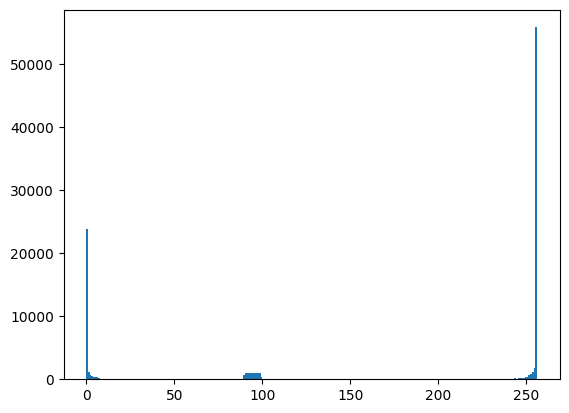

In [18]:
plt.hist(noisy_image.ravel(),256,[0,256])
plt.show()

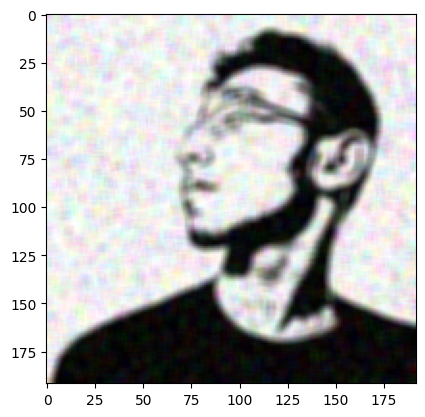

In [11]:
kernel1 = np.ones((5,5),np.float32)/25
smoothbhaismooth = cv2.filter2D(noisy_image,-1,kernel1)
plt.imshow(smoothbhaismooth)

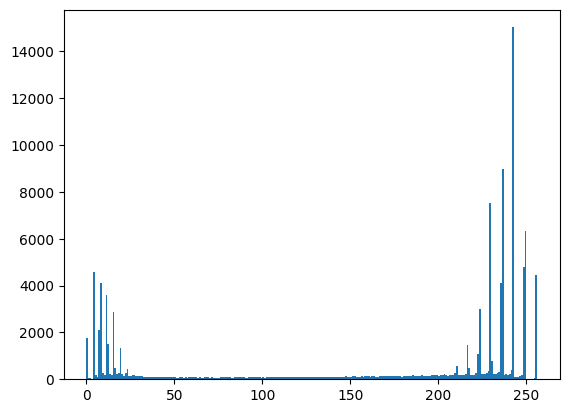

In [19]:
plt.hist(
smoothbhaismooth
    .ravel(),256,[0,256])
plt.show()

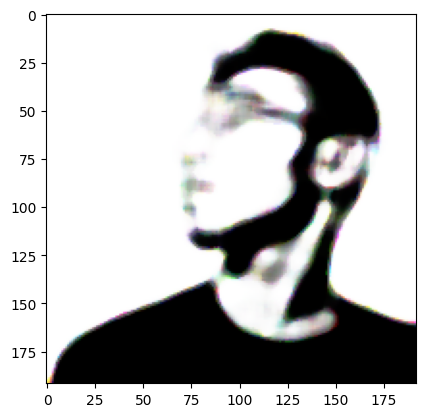

In [12]:
medianimg = cv2.medianBlur(noisy_image, 9)
plt.imshow(medianimg)
plt.show()

Sharp a blurred image

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


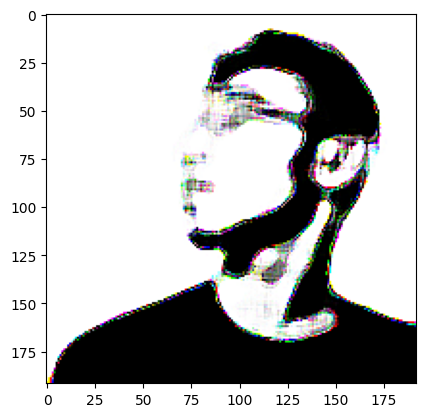

In [20]:
kernalforsharp = -1*np.ones((3,3),dtype=np.uint8)
kernalforsharp[1,1]=9
print(kernalforsharp)
result = cv2.filter2D(medianimg,-1,kernalforsharp)
plt.imshow(result)

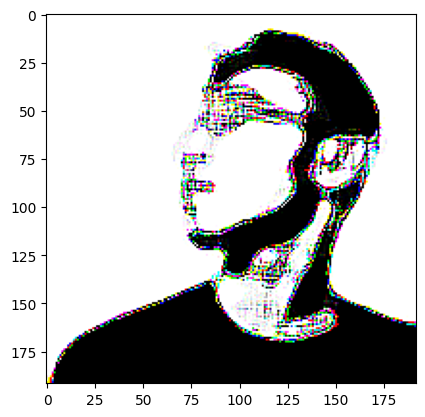

In [21]:

result = cv2.filter2D(result,-1,kernalforsharp)
plt.imshow(result)

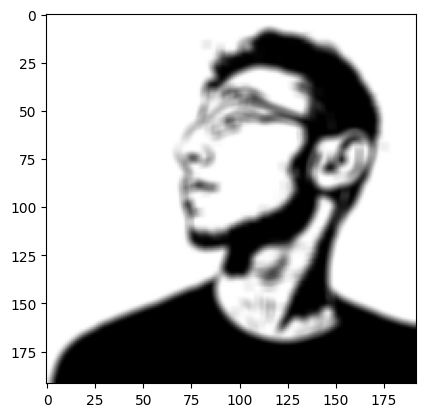

In [22]:
blurredimg = cv2.GaussianBlur(img1,(5,5),cv2.BORDER_DEFAULT)
plt.imshow(blurredimg,cmap='gray')
plt.show()

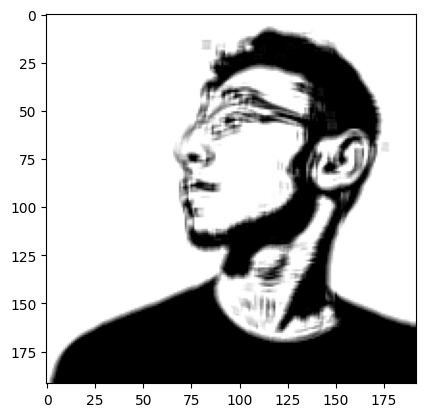

In [25]:

sharpened = cv2.filter2D(blurredimg, -1, kernalforsharp)

plt.imshow(sharpened, cmap='gray')

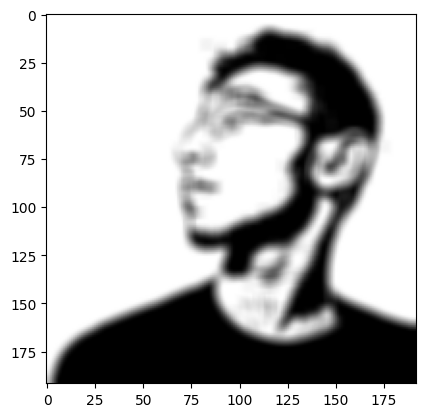

In [26]:

blur2 = cv2.GaussianBlur(img1, (7,7), cv2.BORDER_DEFAULT)

plt.imshow(blur2, cmap='gray')


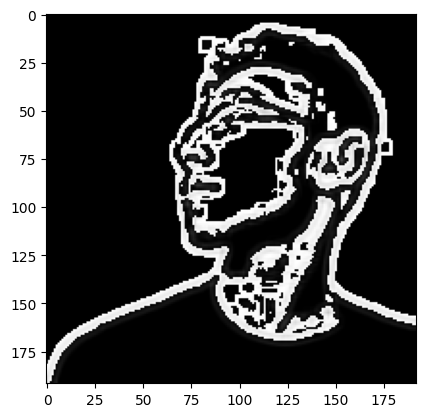

In [27]:
plt.imshow(blur2-blurredimg)

SOBEL kernel 

$M_x =
\begin{pmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1
\end{pmatrix}$
$M_y =
\begin{pmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1
\end{pmatrix}^T$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


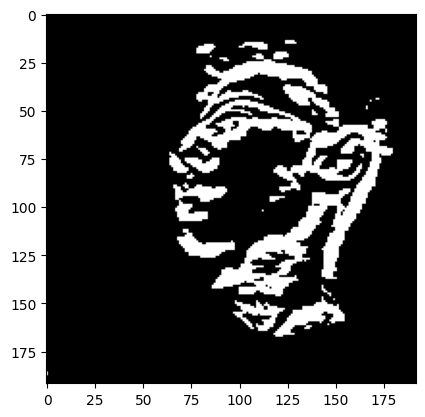

In [28]:
plt.imshow(cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=5),cmap='gray')
plt.show()

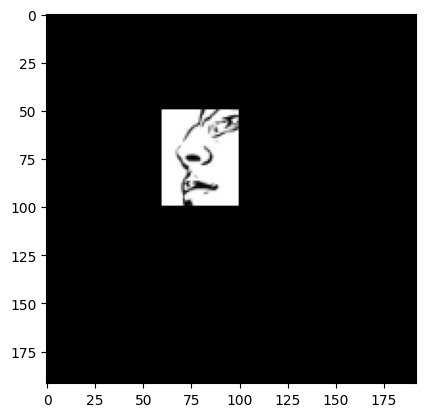

In [34]:
mask = np.zeros(img1.shape[:-1],dtype='uint8')
mask[50:100,60:100]=255
plt.imshow(cv2.bitwise_and(img1,img1,mask=mask))
